In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df = pd.read_csv('input_data/binary_csv_BT00011.csv')

In [64]:
markers = ["PD1", "MHCII", "CD206", "CD45", "CD11C", "LY6G", "GRZB", "FOXP3", "CC3", 
           "CD8", "CD11B", "CD3", "LY6B2", "F480", "ASMA", "KI67", "PANCK"]
X = df[markers].values

In [65]:
obs = df[["sample_ID", "short_ID", "ObjectNumber", "class", "Tumor_ID", "Treatment", "slide", 
          "ROI_factor_per_tumor", "tum_factor_per_treatment"]].copy()

In [66]:
spatial = df[["Location_Center_X", "Location_Center_Y"]].values

In [67]:
adata = ad.AnnData(X=X, obs=obs)

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [71]:
adata.var = pd.DataFrame(index=markers)
adata.var["marker"] = markers
adata.obsm["spatial"] = spatial

In [73]:
adata.write("anndata/binary_csv_BT00011.h5ad")

In [2]:



adata = sc.read('anndata/binary_csv_BT00011.h5ad')

In [3]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    var: 'marker'
    obsm: 'spatial'


In [4]:
# Use the top 10-20 PCs (adjust based on your data)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=15)

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    var: 'marker'
    uns: 'neighbors'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities'


In [6]:
# Run Leiden clustering
sc.tl.leiden(adata, resolution=0.5)

/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_89650/1765518624.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


In [7]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment', 'leiden'
    var: 'marker'
    uns: 'neighbors', 'leiden'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities'


In [8]:
# Compute UMAP for visualization
sc.tl.umap(adata)

# Plot UMAP colored by Leiden clusters
sc.pl.umap(adata, color=['leiden', 'class'])  # Replace 'class' with relevant metadata

# Did not run, taking too long

KeyboardInterrupt: 

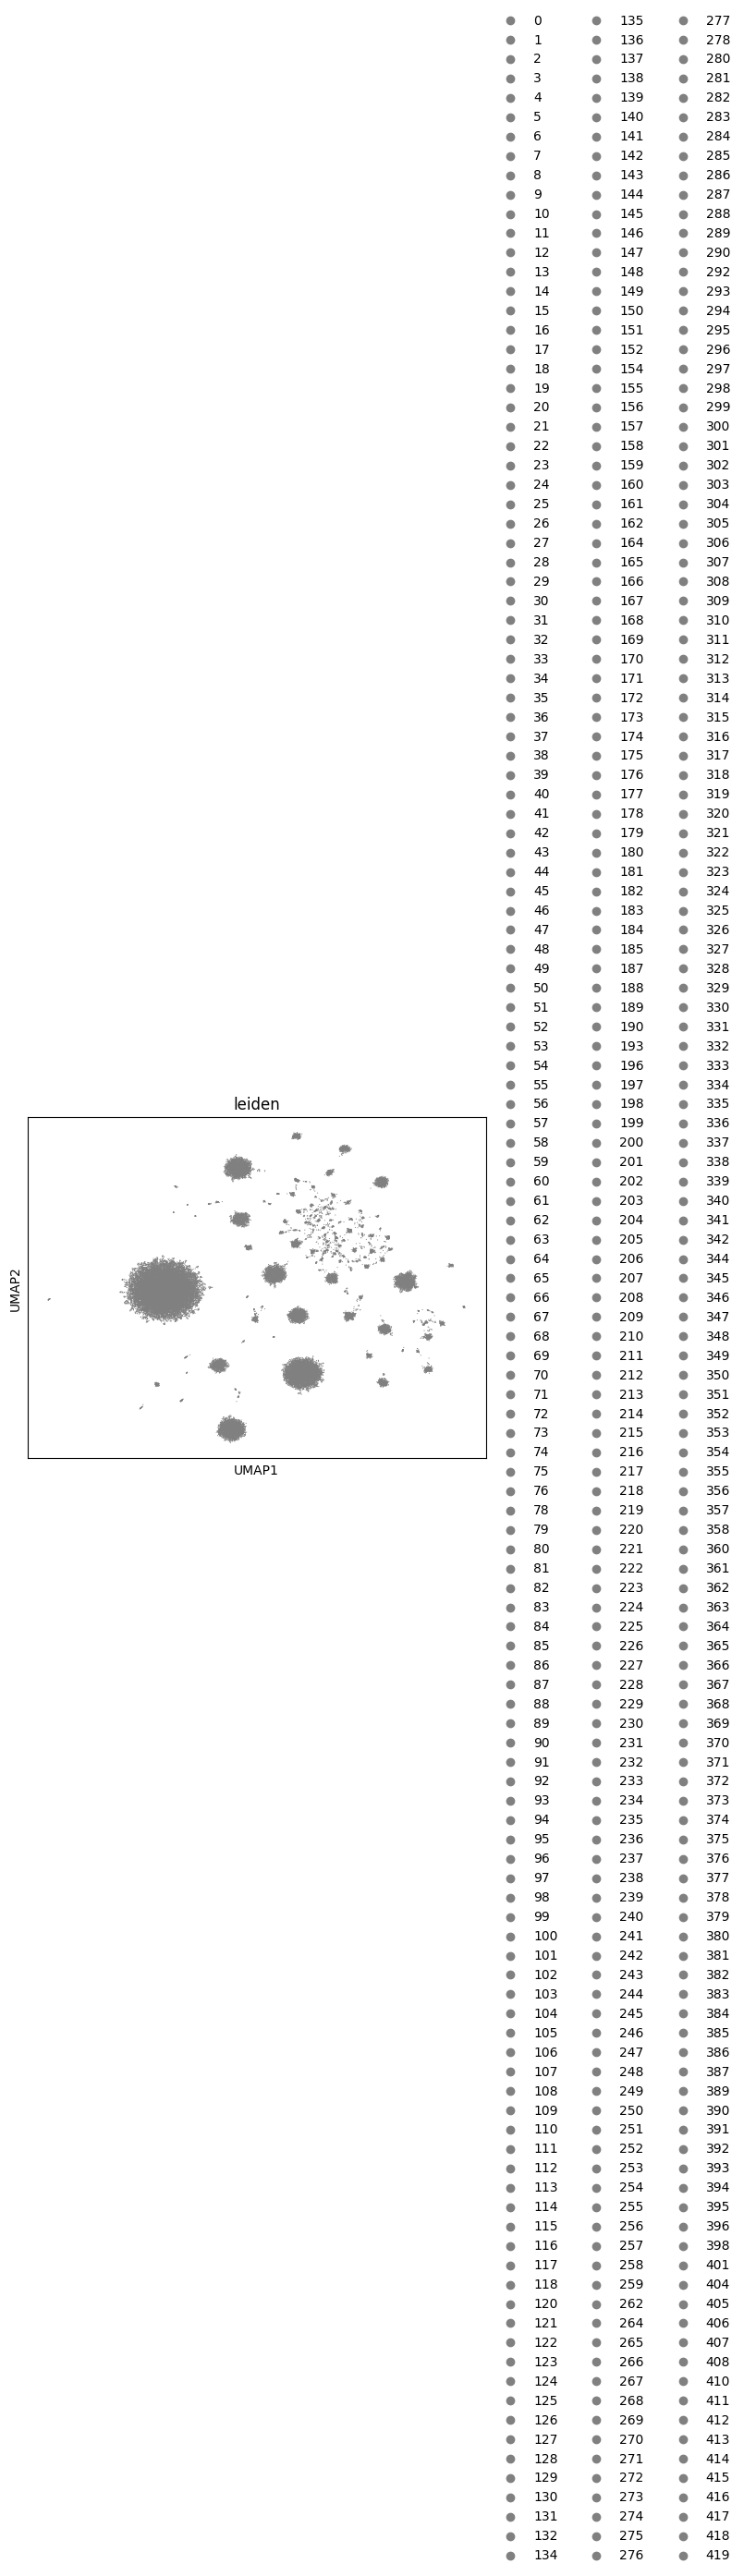

In [12]:
adata_sub = adata[:50000].copy()  # Subsample 50,000 cells
sc.pp.neighbors(adata_sub, n_neighbors=10)
sc.tl.umap(adata_sub)
sc.pl.umap(adata_sub, color='leiden')

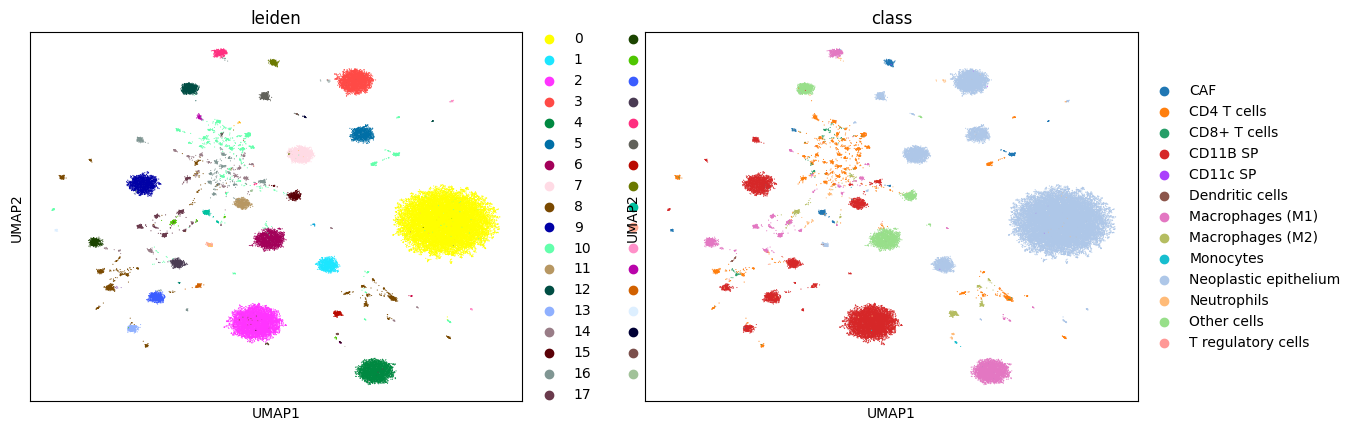

In [16]:
adata2 = sc.read('anndata/binary_csv_BT00011.h5ad')
sc.pp.neighbors(adata2, n_neighbors=10, n_pcs=15)
sc.tl.leiden(adata2, resolution=0.25)
adata_sub2 = adata2[:50000].copy()  # Subsample 50,000 cells
sc.pp.neighbors(adata_sub2, n_neighbors=10)
sc.tl.umap(adata_sub2)
sc.pl.umap(adata_sub2, color=['leiden', 'class'])

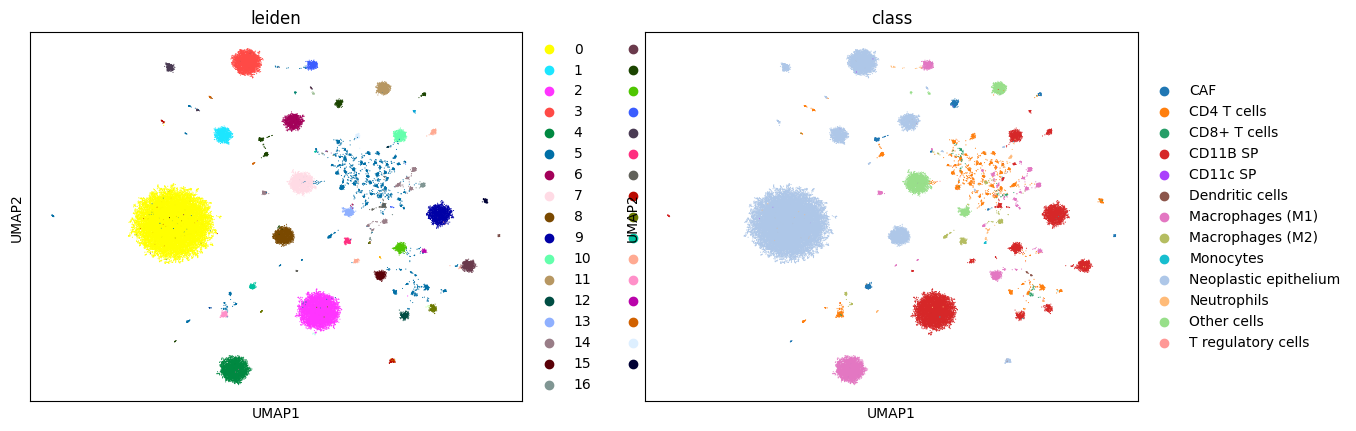

In [18]:
# Change tl.leiden resolution
adata3 = sc.read('anndata/binary_csv_BT00011.h5ad')
sc.pp.neighbors(adata3, n_neighbors=10, n_pcs=15)
sc.tl.leiden(adata3, resolution=0.2)
adata_sub3 = adata3[:50000].copy()  # Subsample 50,000 cells
sc.pp.neighbors(adata_sub3, n_neighbors=10)
sc.tl.umap(adata_sub3)
sc.pl.umap(adata_sub3, color=['leiden', 'class'])

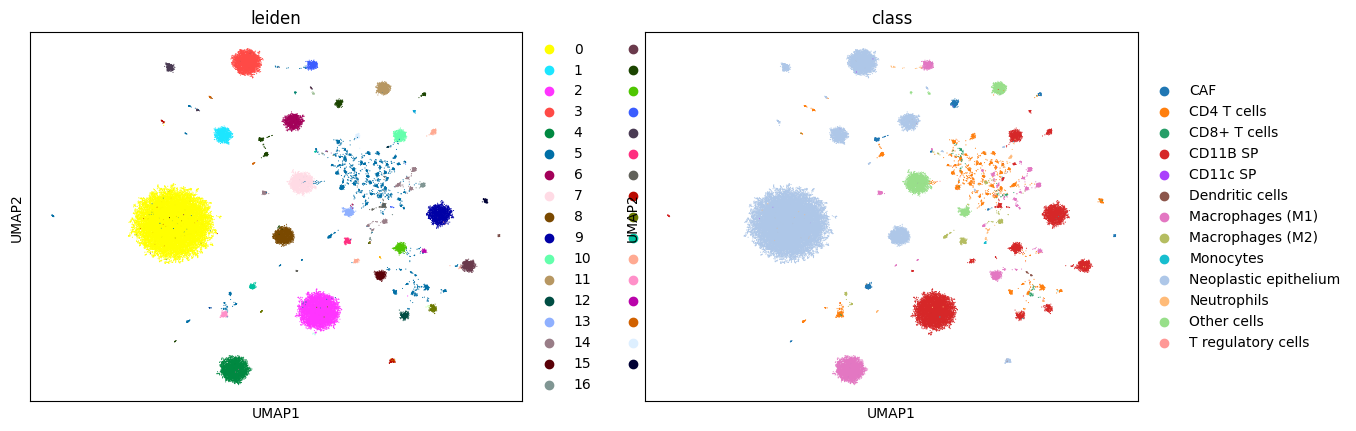

In [103]:
sc.pl.umap(adata_sub3, color=['leiden', 'class'], save="umap.png")

/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-package

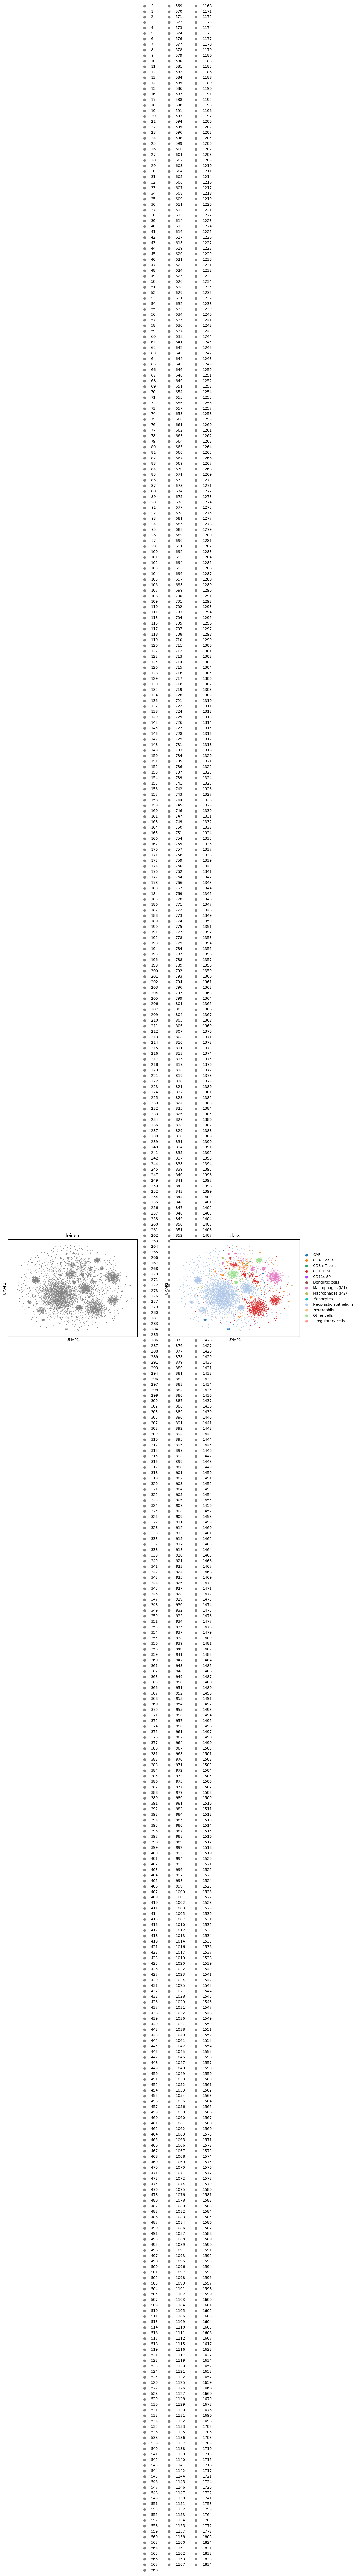

In [20]:
# Change pp.neighbors n_neighbors
# It failed: failed. This is likely due to too small an eigengap. Consider adding some noise or jitter to your data.

adata4 = sc.read('anndata/binary_csv_BT00011.h5ad')
sc.pp.neighbors(adata4, n_neighbors=5, n_pcs=15)
sc.tl.leiden(adata4, resolution=0.2)
adata_sub4 = adata4[:50000].copy()
sc.pp.neighbors(adata_sub4, n_neighbors=5)
sc.tl.umap(adata_sub4)
sc.pl.umap(adata_sub4, color=['leiden', 'class'])

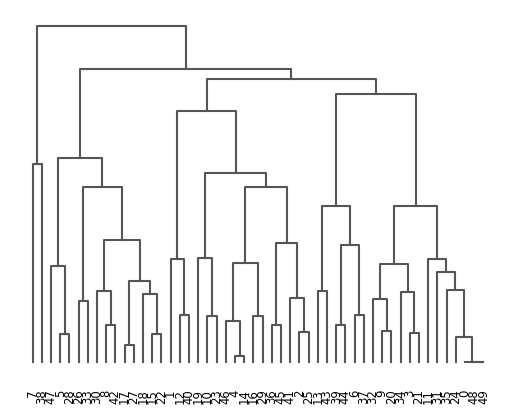

<Axes: >

In [22]:
sc.tl.dendrogram(adata3, groupby='leiden')
sc.pl.dendrogram(adata3, groupby='leiden', save='dendrogram_leiden.png')

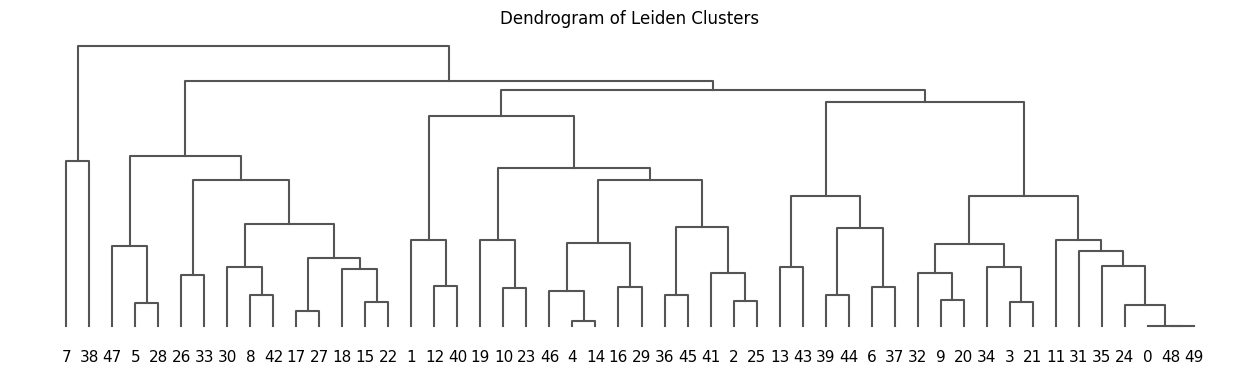

In [95]:
sc.pl.dendrogram(adata3, groupby='leiden', show=False)  # Generate the plot without displaying it
plt.gcf().set_size_inches(16, 4)  # Set the figure size (width, height in inches)
plt.title("Dendrogram of Leiden Clusters")
plt.xticks(rotation=0, fontsize=11)
plt.savefig("dendrogram_leiden_big.png", dpi=300, bbox_inches='tight')  # Save the figure
plt.show()  # Display the adjusted plot if needed

In [24]:
pd.crosstab(adata3.obs['leiden'], adata3.obs['class'])

class,CAF,CD4 T cells,CD8+ T cells,CD11B SP,CD11c SP,Dendritic cells,Macrophages (M1),Macrophages (M2),Monocytes,Neoplastic epithelium,Neutrophils,Other cells,T regulatory cells
leiden,,,,,,,,,,,,,
0,0,1,1,0,1,0,0,0,0,75182,20,0,0
1,0,3,0,0,7,0,0,0,0,10240,2,0,0
2,0,0,0,9748,0,0,1,0,3,0,0,0,0
3,0,0,0,0,4,0,0,0,0,7491,2,0,0
4,0,0,0,0,0,0,7319,0,1,0,0,0,0
5,2,3245,353,189,13,31,1154,867,46,81,296,19,114
6,0,0,0,1,2,0,0,0,0,6358,1,0,0
7,0,0,0,0,0,0,0,0,0,1,3,4699,0
8,0,1,0,0,5,0,0,0,0,4385,1,0,0


In [29]:
contingency_table = pd.crosstab(adata3.obs['leiden'], adata3.obs['class'])
contingency_table.to_csv('leiden_class_contingency.csv')

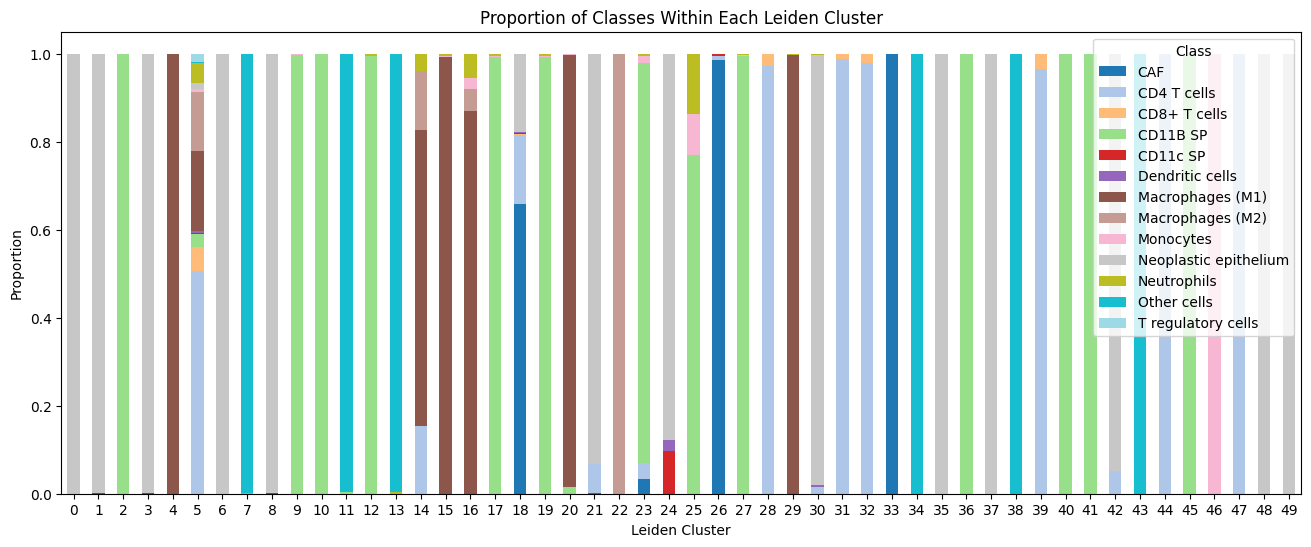

In [101]:
proportions = pd.crosstab(adata3.obs['leiden'], adata3.obs['class'], normalize='index')
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
plt.title("Proportion of Classes Within Each Leiden Cluster")
plt.xlabel("Leiden Cluster")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Class")
plt.gcf().set_size_inches(16, 6)  # Set the figure size (width, height in inches)
plt.savefig("leiden/leiden_contigency_class.png", dpi=300, bbox_inches='tight')  # Save the figure
plt.show()

leiden
0     75205
1     10252
2      9752
3      7497
4      7320
5      6410
6      6362
7      4703
8      4392
9      2488
10     2130
11     1958
12     1664
13     1375
14     1358
15     1302
16      983
17      912
18      829
19      789
20      783
21      614
22      486
23      447
24      398
25      375
26      336
27      329
28      315
29      312
30      261
31      177
32      148
33       62
34       57
35       55
36       45
37       44
38       31
39       29
40       28
41       21
42       19
43       18
44       17
45       11
46       11
47       11
48       11
49       11
Name: count, dtype: int64


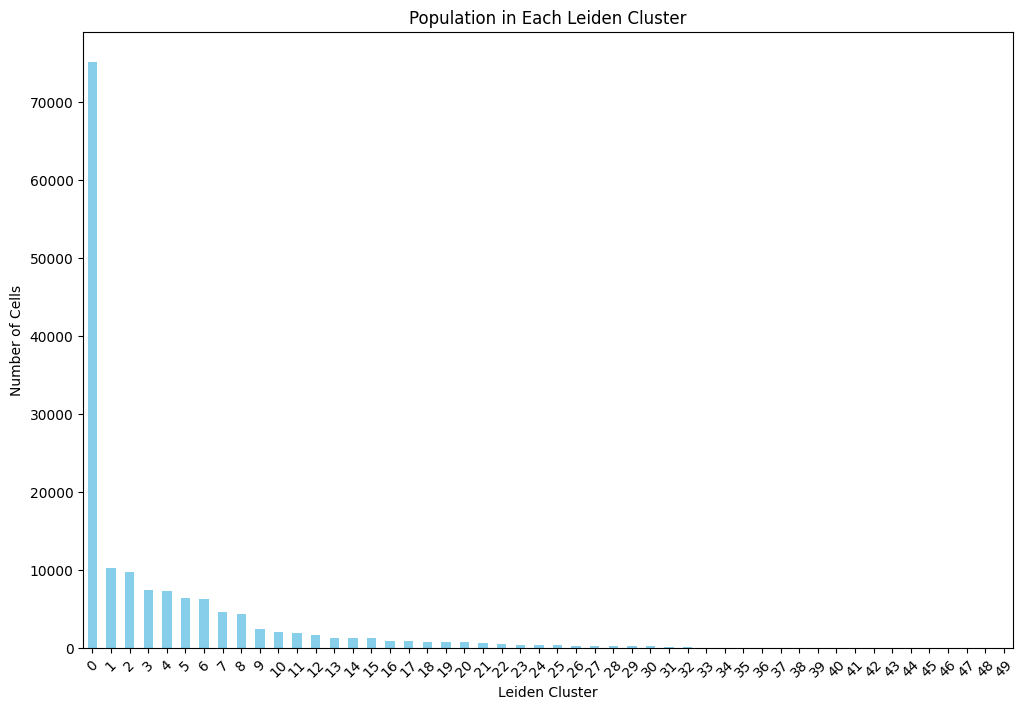

In [33]:
# Count the number of cells in each cluster
cluster_counts = adata3.obs['leiden'].value_counts()
print(cluster_counts)

# Plot the bar plot
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Population in Each Leiden Cluster')
plt.xlabel('Leiden Cluster')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 8)
plt.savefig("leiden/leiden_counts.png", dpi=300, bbox_inches='tight')
plt.show()

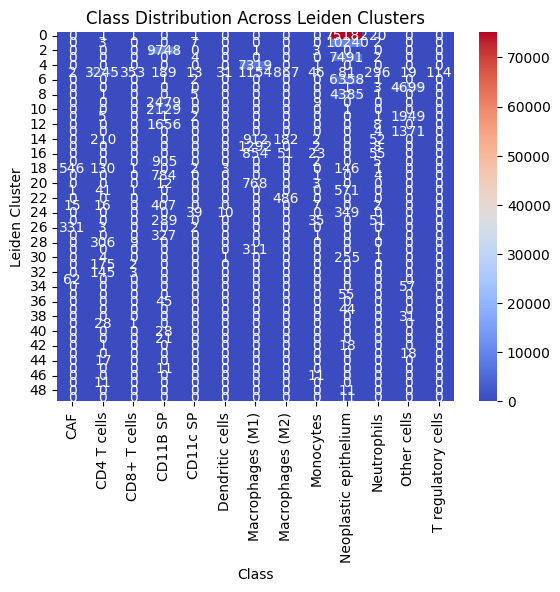

In [35]:
import seaborn as sns

sns.heatmap(contingency_table, cmap="coolwarm", annot=True, fmt="d")
plt.title("Class Distribution Across Leiden Clusters")
plt.xlabel("Class")
plt.ylabel("Leiden Cluster")
plt.show()

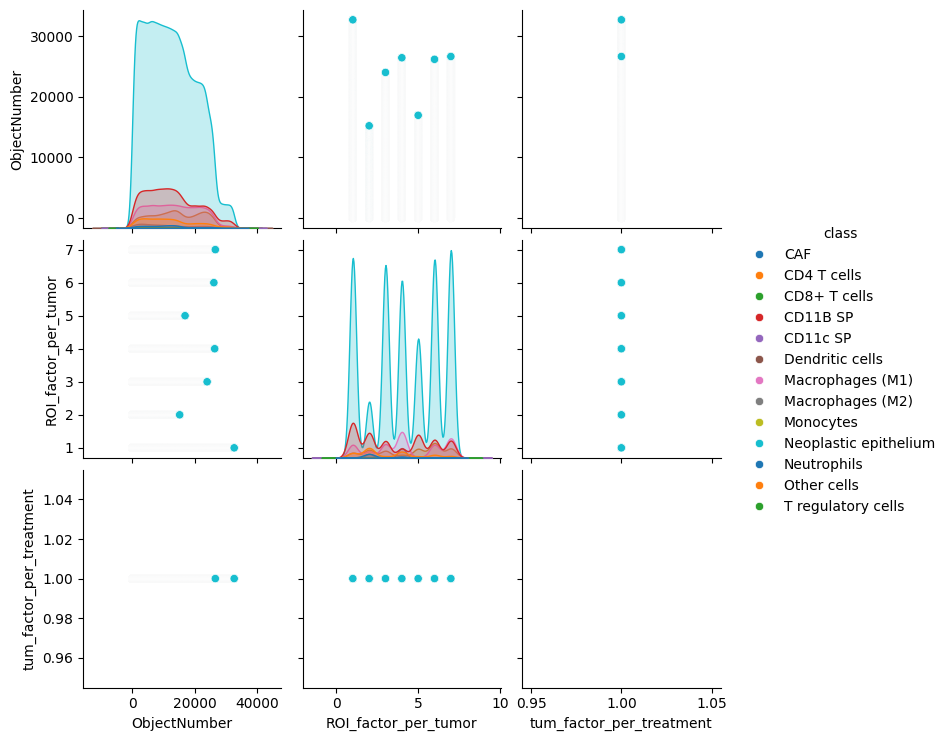

In [40]:
sns.pairplot(adata3.obs, hue="class", diag_kind="kde", palette="tab10")
plt.show()

In [74]:
# This code can be improved when rerun. -- the marker name is appendixed from an un-corrupted file

df = pd.DataFrame(adata3.X.toarray() if hasattr(adata3.X, 'toarray') else adata3.X, columns=adata3.var_names, index=adata3.obs_names)
df['leiden'] = adata3.obs['leiden']
df.columns = list(adata.var_names) + ['leiden']

In [77]:
df.head()

,PD1,MHCII,CD206,CD45,CD11C,LY6G,GRZB,FOXP3,CC3,CD8,CD11B,CD3,LY6B2,F480,ASMA,KI67,PANCK,leiden
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,18
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,26
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,26
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,26
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,18


In [78]:
# Group by 'leiden' and compute the mean for each marker
markers = ["PD1", "MHCII", "CD206", "CD45", "CD11C", "LY6G", "GRZB", "FOXP3", "CC3", 
           "CD8", "CD11B", "CD3", "LY6B2", "F480", "ASMA", "KI67", "PANCK"]
summary_table = df.groupby('leiden')[markers].mean()

# Display the summarized table
print(summary_table)

             PD1     MHCII     CD206      CD45     CD11C      LY6G      GRZB  \
leiden                                                                         
0       0.000160  0.000266  0.000173  0.000253  0.000000  0.000027  0.000306   
1       0.001268  0.001658  0.000488  0.001268  0.000683  0.000000  0.000195   
2       0.000000  0.000000  0.000000  0.000308  0.000000  0.000308  0.000513   
3       0.000400  0.000000  0.000400  0.000267  0.000534  0.000000  0.000400   
4       0.000000  0.000000  0.000000  0.000000  0.000000  0.000137  0.000546   
5       0.138222  0.100468  0.280655  0.454290  0.073635  0.019501  0.009048   
6       0.000786  0.000314  0.000472  0.000000  0.000314  0.000000  0.000000   
7       0.001701  0.000000  0.000425  0.000000  0.000000  0.000213  0.001063   
8       0.000455  0.000000  0.000000  0.000911  0.001138  0.000000  0.000455   
9       0.000804  0.000000  0.000402  0.000402  0.000000  0.003617  0.000000   
10      0.000939  0.000000  0.000939  0.

/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_89650/2305586360.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = df.groupby('leiden')[markers].mean()


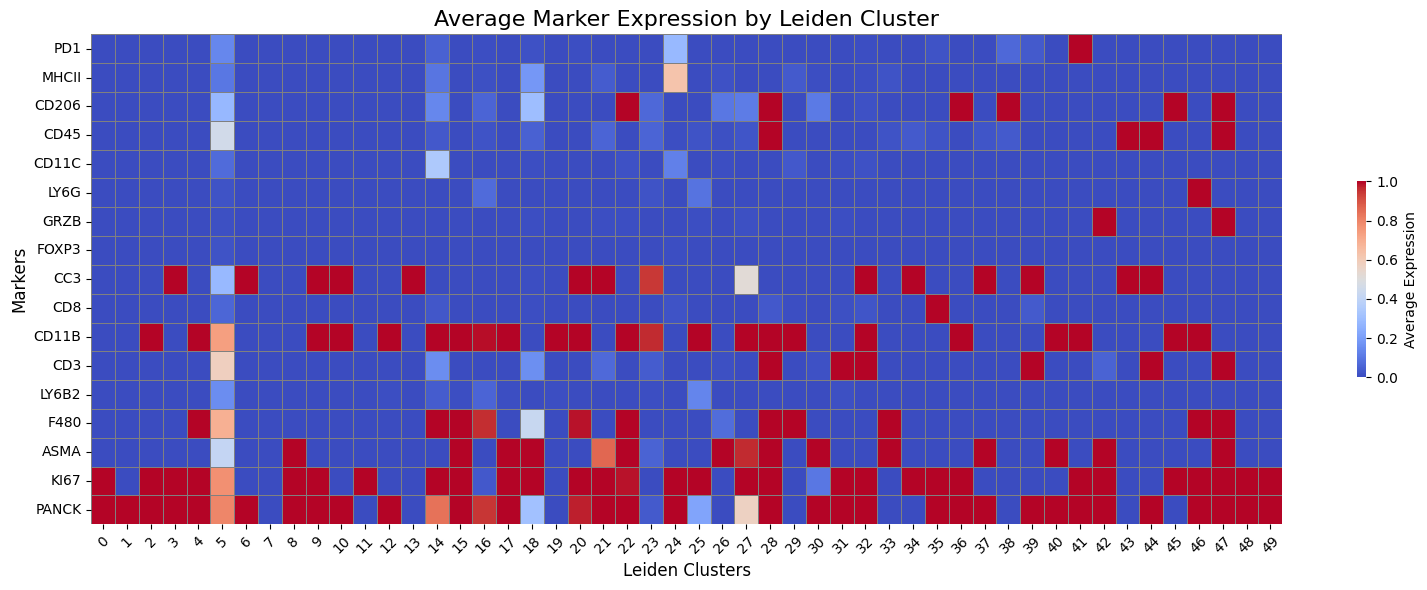

In [96]:

plt.figure(figsize=(16, 6))  # Adjust size as needed
sns.heatmap(summary_table.T, cmap='coolwarm', annot=False, fmt=".2f", 
            cbar_kws={'label': 'Average Expression', 'shrink': 0.4},
            linewidths=0.5, linecolor='gray')

# Add labels and title
plt.title('Average Marker Expression by Leiden Cluster', fontsize=16)
plt.ylabel('Markers', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Leiden Clusters', fontsize=12)
plt.yticks(rotation=0)
plt.savefig("leiden/marker_expression_by_leiden_cluster.png", dpi=300, bbox_inches='tight')  # Save the figure
# Show the heatmap
plt.tight_layout()
plt.show()

In [104]:
adata3.write("anndata/leiden_celltyping_adata3.h5ad")

In [105]:
print(adata3)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment', 'leiden'
    var: 'marker'
    uns: 'neighbors', 'leiden', 'dendrogram_leiden', 'rank_genes_groups'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities'


In [106]:
print(adata_sub3)

AnnData object with n_obs × n_vars = 50000 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment', 'leiden'
    var: 'marker'
    uns: 'neighbors', 'leiden', 'umap', 'leiden_colors', 'class_colors'
    obsm: 'spatial', 'X_umap'
    obsp: 'distances', 'connectivities'


In [107]:
adata_sub3.write("anndata/umap_adata_sub3.h5ad")